In [74]:
%matplotlib inline
import csv
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


TRAIN_FILE_PATH = "data/X_train.csv"
TARGET_FILE_PATH =  "data/y_train.csv"
TEST_FILE_PATH = "data/X_test.csv"

In [6]:
def add_target(path, data):
    target =  pd.read_csv(path)
    return data.merge(target, left_on='id', right_on='id', how="left", validate="1:1")

In [29]:
train_data = pd.read_csv(TRAIN_FILE_PATH)
print("Amount of features: {}".format(len(list(train_data)) - 1)) # -1 due to id
# add target to dataframe
train_data = add_target(TARGET_FILE_PATH, train_data)

print("Amount of observations: {}".format(len(train_data.index)))
print("Min age: {} Max age: {}".format(train_data["y"].min(), train_data["y"].max()))

Amount of features: 887
Amount of observations: 1212
Min age: 42.0 Max age: 96.0


count    889.000000
mean      86.750281
std        9.726818
min        0.000000
25%       81.000000
50%       87.000000
75%       93.000000
max      115.000000
dtype: float64


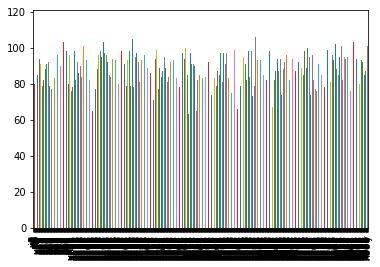

In [27]:
missingData = train_data.isnull().sum()
missingData.plot(kind='bar')
print(missingData.describe())

In [28]:
train_data_no_nan = train_data.dropna()
print(train_data_no_nan.shape)

(0, 889)


In [75]:
# fill missing values with mean column values
train_mean_values = train_data.mean()
train_data_mean =  train_data.fillna(train_mean_values)

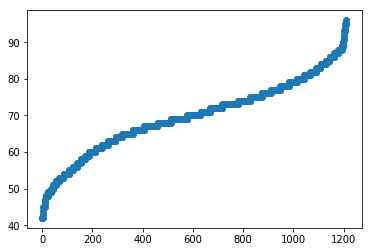

In [8]:
temp = train_data.sort_values(by=['y']).reset_index(drop=True)
y = temp["y"]
x = range(len(y))
plt.scatter(x, y)

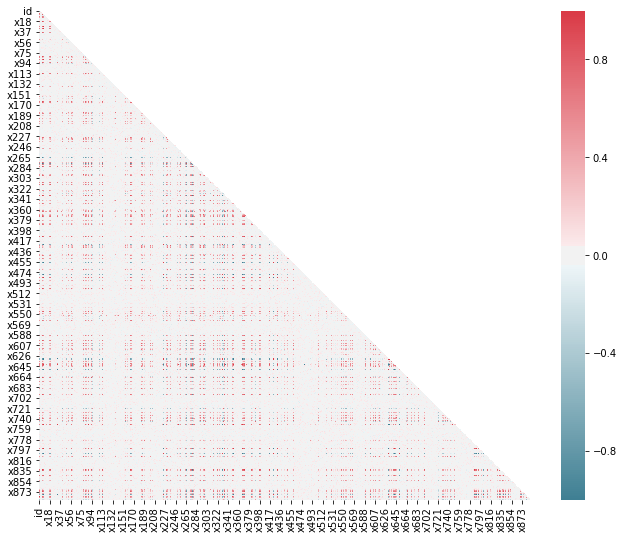

In [9]:
# Compute the correlation matrix
corr = train_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

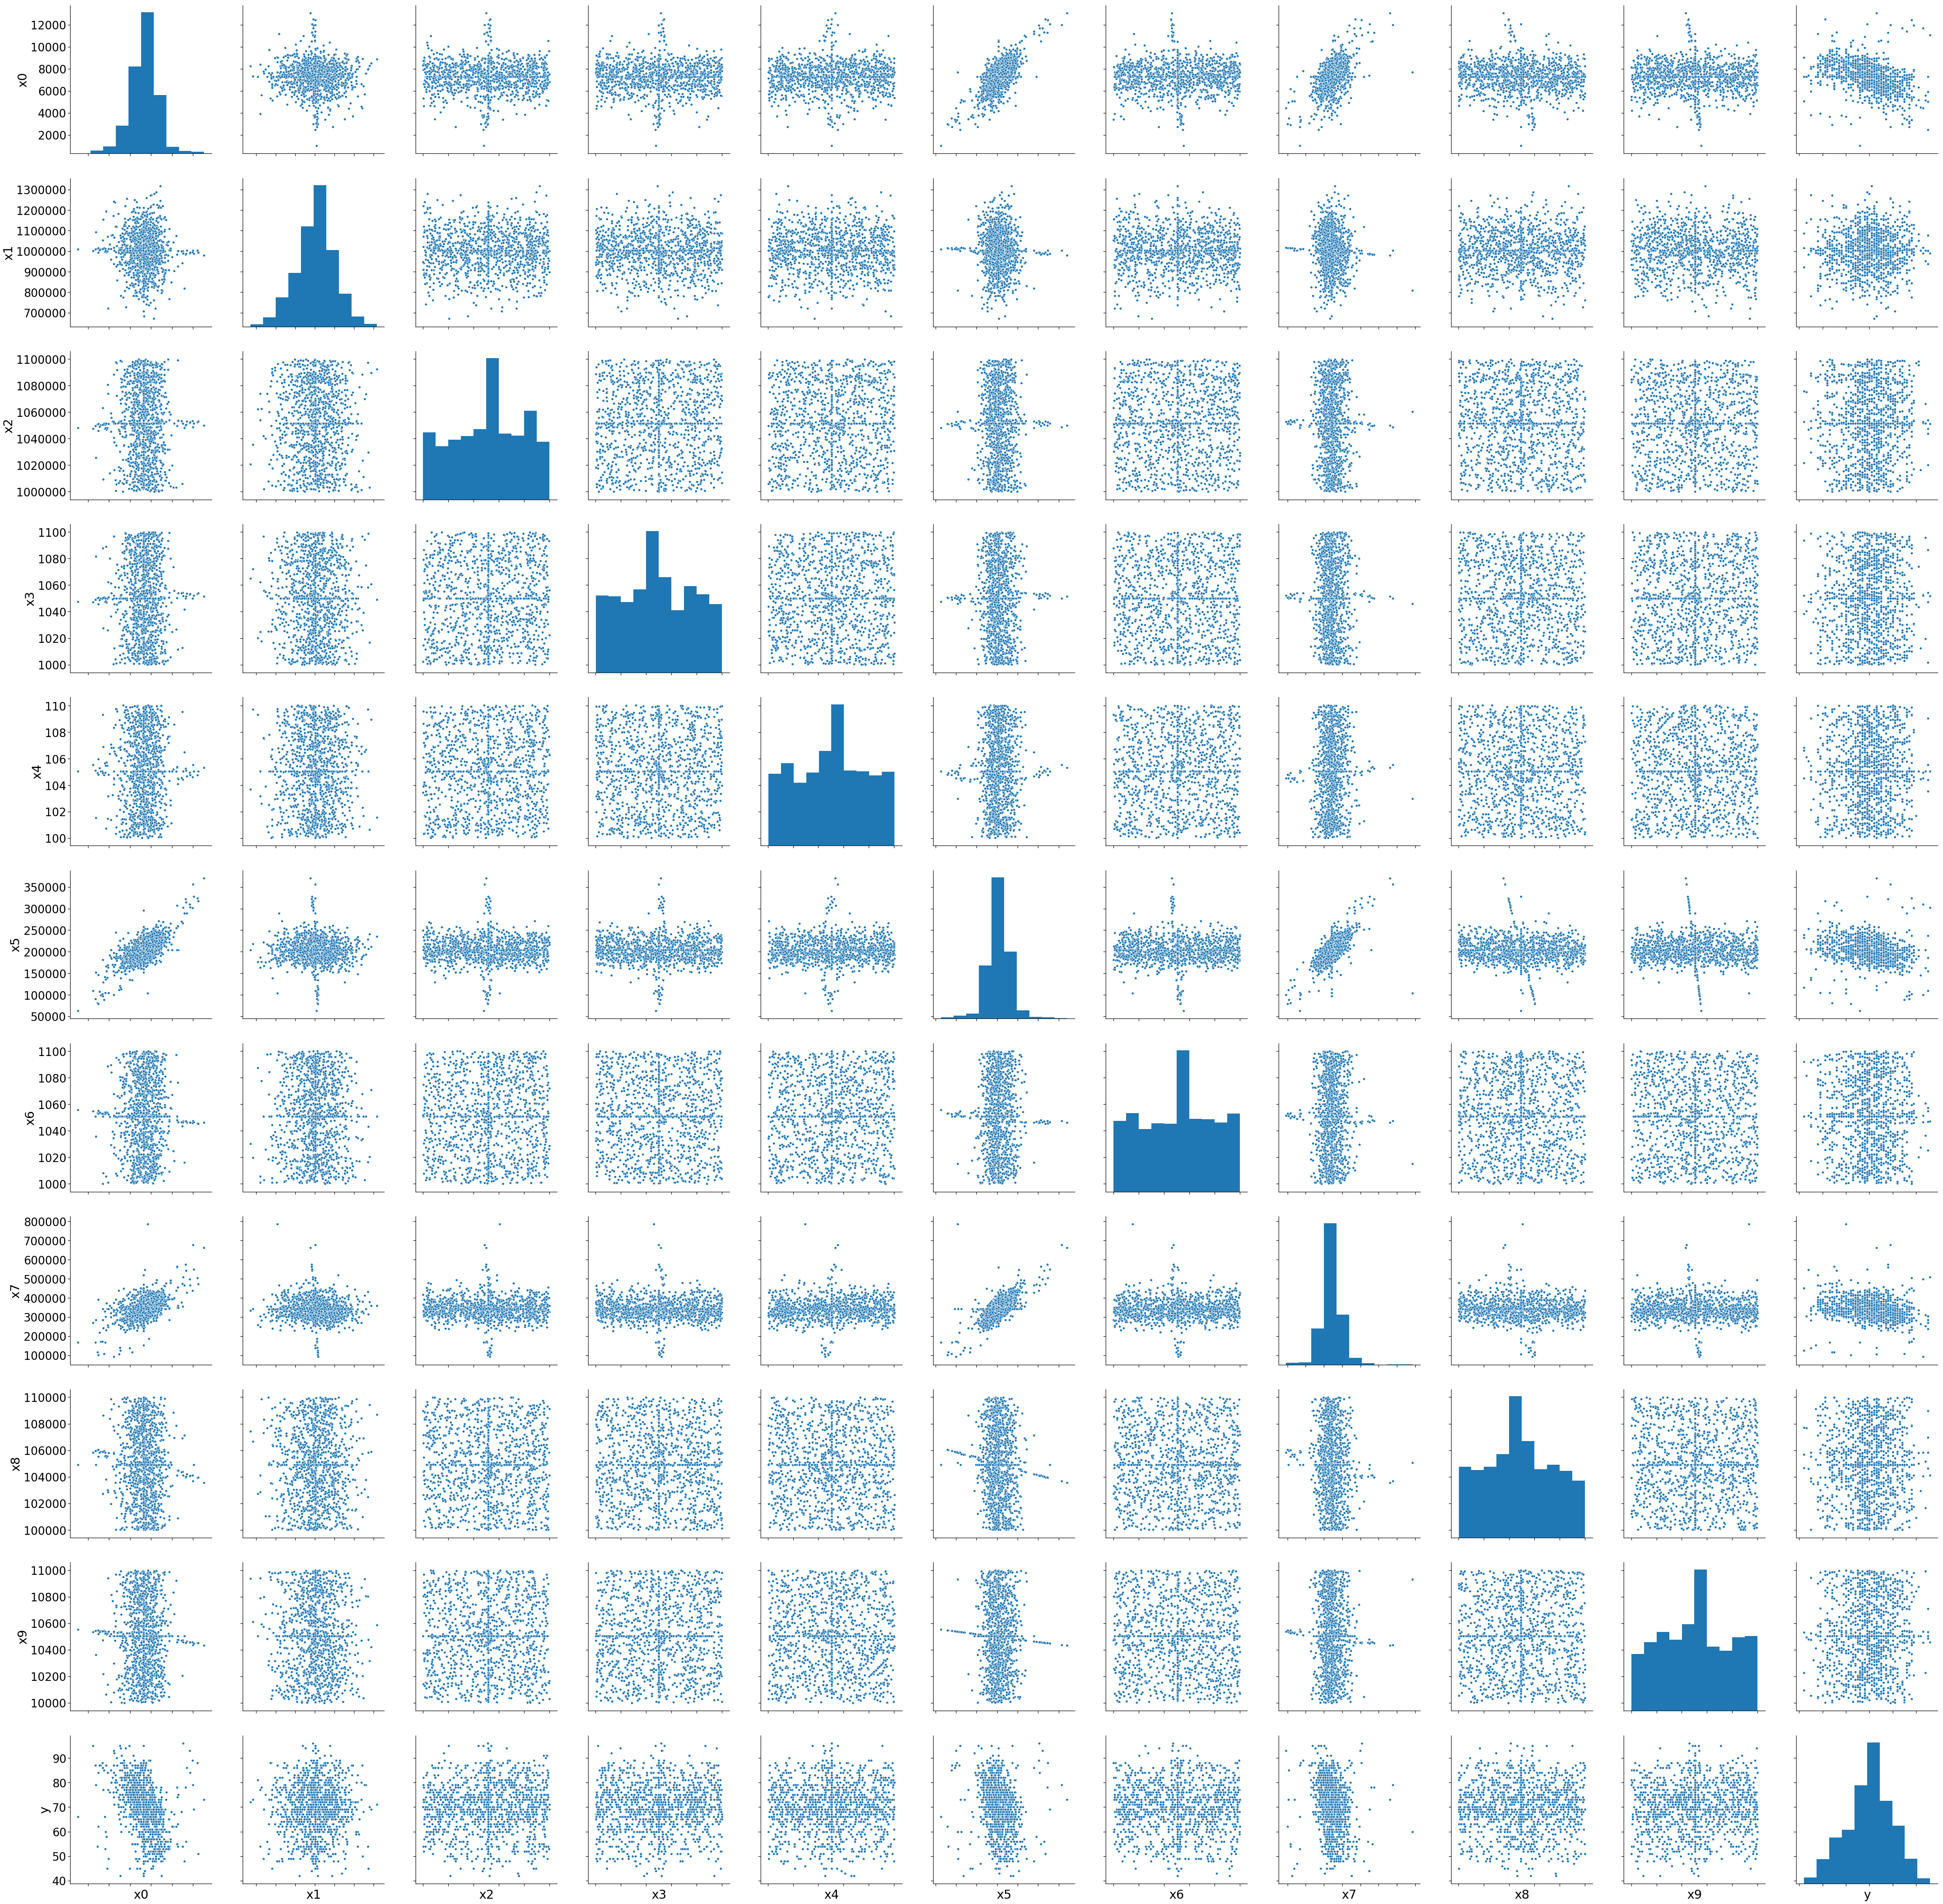

In [40]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(train_data_mean[["x{}".format(i) for i in range(10)] + ['y']], palette='tab20',height=6)
g.set(xticklabels=[]);

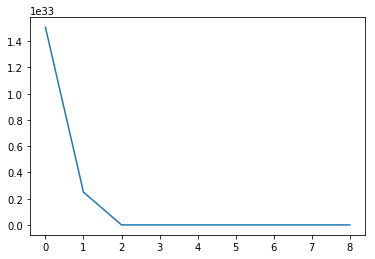

In [16]:
pca = PCA()
temp = train_data.fillna(99999999999999)
pca.fit(temp)
eigenvalues = pca.explained_variance_

plt.plot(eigenvalues[1:10])


In [42]:

# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [53]:
X = train_data_mean.drop(["id", "y"], axis=1).as_matrix()
Y = train_data_mean["y"].values
colnames = train_data_mean.drop(["id", "y"], axis=1).columns

rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [54]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 887 features.
Fitting estimator with 886 features.
Fitting estimator with 885 features.
Fitting estimator with 884 features.
Fitting estimator with 883 features.
Fitting estimator with 882 features.
Fitting estimator with 881 features.
Fitting estimator with 880 features.
Fitting estimator with 879 features.
Fitting estimator with 878 features.
Fitting estimator with 877 features.
Fitting estimator with 876 features.
Fitting estimator with 875 features.
Fitting estimator with 874 features.
Fitting estimator with 873 features.
Fitting estimator with 872 features.
Fitting estimator with 871 features.
Fitting estimator with 870 features.
Fitting estimator with 869 features.
Fitting estimator with 868 features.
Fitting estimator with 867 features.
Fitting estimator with 866 features.
Fitting estimator with 865 features.
Fitting estimator with 864 features.
Fitting estimator with 863 features.
Fitting estimator with 862 features.
Fitting estimator with 861 features.
F

Fitting estimator with 665 features.
Fitting estimator with 664 features.
Fitting estimator with 663 features.
Fitting estimator with 662 features.
Fitting estimator with 661 features.
Fitting estimator with 660 features.
Fitting estimator with 659 features.
Fitting estimator with 658 features.
Fitting estimator with 657 features.
Fitting estimator with 656 features.
Fitting estimator with 655 features.
Fitting estimator with 654 features.
Fitting estimator with 653 features.
Fitting estimator with 652 features.
Fitting estimator with 651 features.
Fitting estimator with 650 features.
Fitting estimator with 649 features.
Fitting estimator with 648 features.
Fitting estimator with 647 features.
Fitting estimator with 646 features.
Fitting estimator with 645 features.
Fitting estimator with 644 features.
Fitting estimator with 643 features.
Fitting estimator with 642 features.
Fitting estimator with 641 features.
Fitting estimator with 640 features.
Fitting estimator with 639 features.
F

Fitting estimator with 442 features.
Fitting estimator with 441 features.
Fitting estimator with 440 features.
Fitting estimator with 439 features.
Fitting estimator with 438 features.
Fitting estimator with 437 features.
Fitting estimator with 436 features.
Fitting estimator with 435 features.
Fitting estimator with 434 features.
Fitting estimator with 433 features.
Fitting estimator with 432 features.
Fitting estimator with 431 features.
Fitting estimator with 430 features.
Fitting estimator with 429 features.
Fitting estimator with 428 features.
Fitting estimator with 427 features.
Fitting estimator with 426 features.
Fitting estimator with 425 features.
Fitting estimator with 424 features.
Fitting estimator with 423 features.
Fitting estimator with 422 features.
Fitting estimator with 421 features.
Fitting estimator with 420 features.
Fitting estimator with 419 features.
Fitting estimator with 418 features.
Fitting estimator with 417 features.
Fitting estimator with 416 features.
F

Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
F

In [55]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)
print("LinReg done")

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)
print("Ridge done")

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)
print("Lasso done")

LinReg done
Ridge done


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.659662e-38
  overwrite_a=True).T


Lasso done


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [56]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50building tree 2 of 50
building tree 3 of 50

building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


    Feature  Mean Ranking
63      x63          0.45
291    x291          0.42
751    x751          0.39
328    x328          0.39
96      x96          0.36
615    x615          0.32
735    x735          0.32
608    x608          0.31
651    x651          0.30
685    x685          0.30
292    x292          0.29
237    x237          0.29
746    x746          0.29
664    x664          0.29
460    x460          0.29
428    x428          0.28
426    x426          0.28
882    x882          0.27
11      x11          0.26
870    x870          0.26
82      x82          0.25
731    x731          0.25
474    x474          0.25
604    x604          0.24
297    x297          0.24
730    x730          0.24
209    x209          0.23
196    x196          0.23
679    x679          0.23
263    x263          0.23
185    x185          0.23
361    x361          0.23
838    x838          0.23
98      x98          0.23
490    x490          0.22
126    x126          0.22
497    x497          0.22
192    x192 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


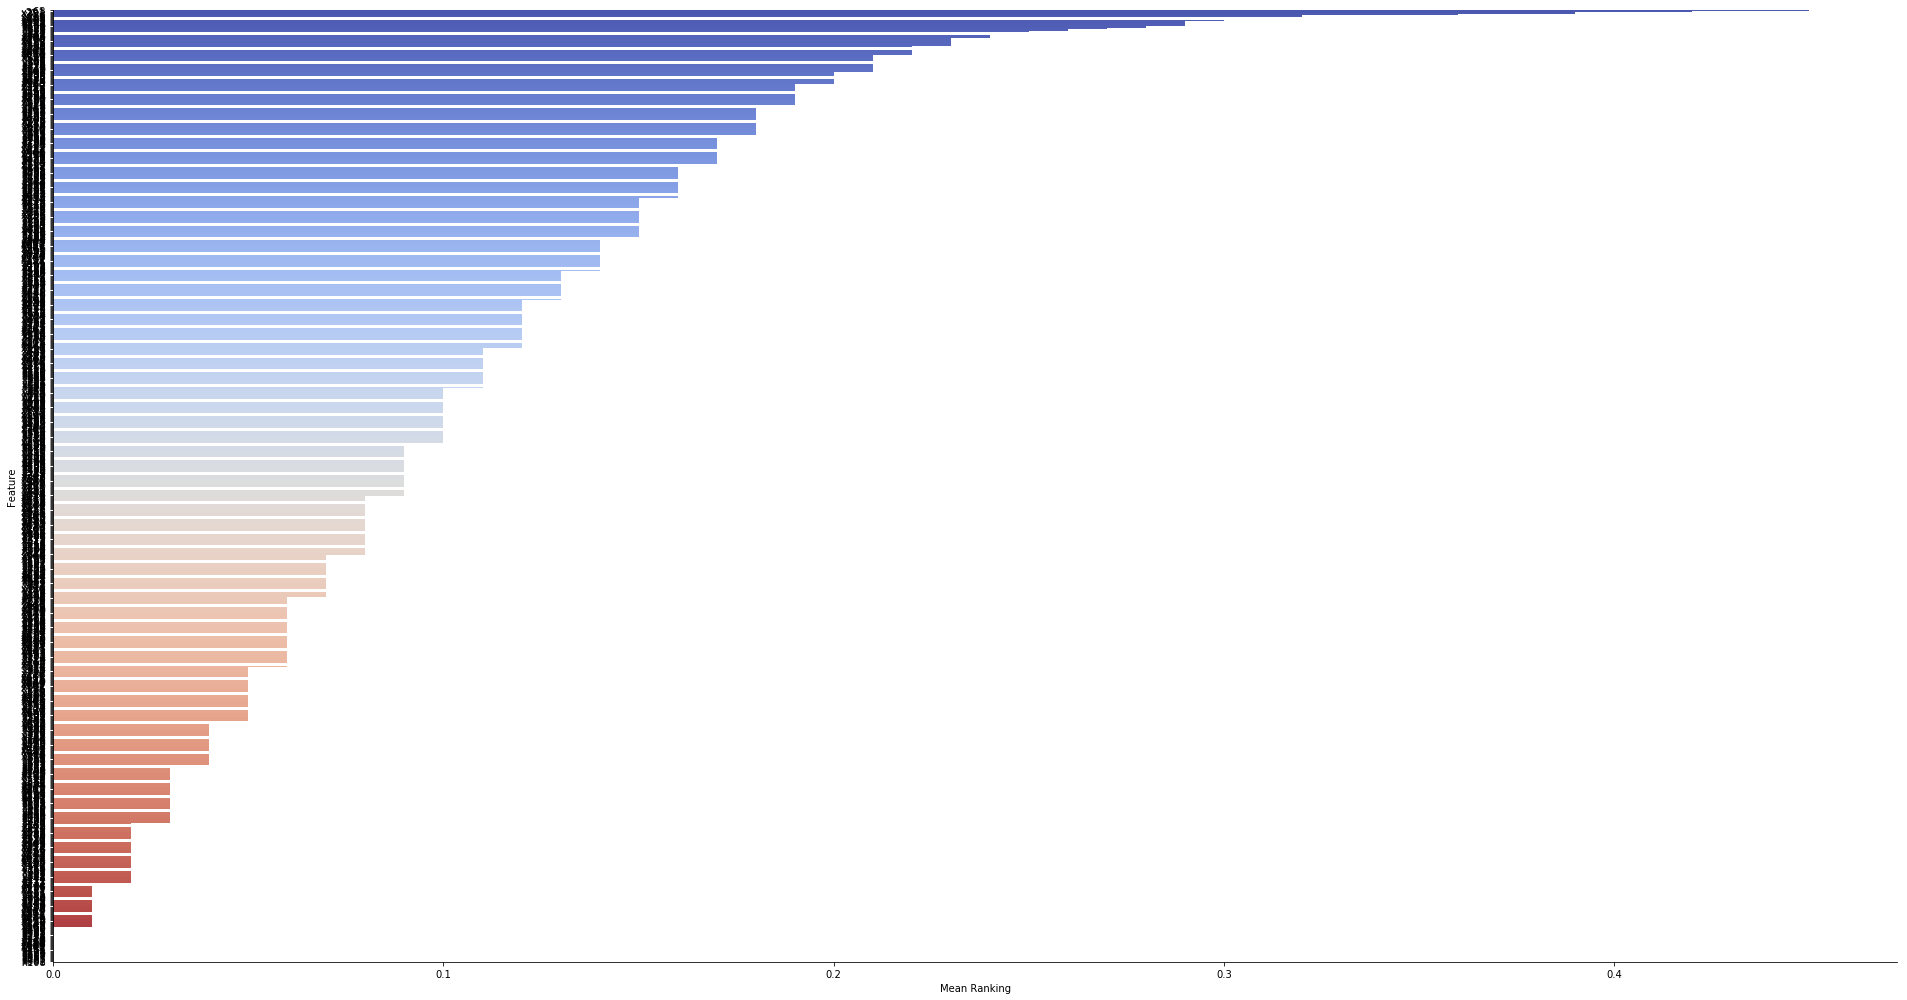

In [62]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
    
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", size=14, aspect=1.9, palette='coolwarm');

In [79]:
# use the first 50 features
n_features_to_use = 50
feature_list = list(meanplot.head(n_features_to_use)["Feature"].values) 
train_subset = train_data_mean[feature_list + ["id", "y"]]

In [73]:
X_subset = train_subset.drop(["id", "y"], axis=1).as_matrix()
Y_subset = train_subset["y"].values
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X_subset,Y_subset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50building tree 44 of 5

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=3, warm_start=False)

In [86]:
# load the test set
test_set =  pd.read_csv(TEST_FILE_PATH)
test_set = target.fillna(train_mean_values)
test_set_sub = test_set[feature_list]

y_pred = rf.predict(test_set_sub.as_matrix())
test_set["y"] = y_pred



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [88]:
# create submission
test_set[["id", "y"]].to_csv("submissions/first.csv", index= False)